In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

CSV_PATH = "/content/drive/MyDrive/biolip_subset_1200.csv"
df = pd.read_csv(CSV_PATH)

print("Rows, Cols:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Some basic checks
print("\nUnique proteins (rows):", len(df))
print("Unique PDB IDs:", df["pdb_id"].nunique() if "pdb_id" in df.columns else "pdb_id column missing")
print("Unique chains:", df["chain"].nunique() if "chain" in df.columns else "chain column missing")

# seq_len stats

if "seq_len" in df.columns:
  print("\nseq_len summary:")
  print(df["seq_len"].describe())

else:
  print("\nseq_len column missing")

# missingness

missing = df.isna().mean().sort_values(ascending=False)
print("\nMissing fraction by column (top10):")
print(missing.head(10))

# quick integrity checks
expected_rows = 1200
if df.shape[0] != expected_rows:
  print(f"\nNOTE: expected {expected_rows} rows but found {df.shape[0]}. (Not fatal, just flagging.)")

if "sequence" in df.columns:
  empty_seq = (df["sequence"].astype(str).str.len() == 0).sum()
  print("Empty sequences:", empty_seq)


Rows, Cols: (1200, 7)

Columns:
 ['pdb_id', 'chain', 'resolution', 'seq_len', 'sequence', 'raw_line', 'pdb_chain_key']

Unique proteins (rows): 1200
Unique PDB IDs: 1164
Unique chains: 105

seq_len summary:
count    1200.000000
mean      265.095833
std       106.174719
min        80.000000
25%       181.750000
50%       257.000000
75%       344.250000
max       500.000000
Name: seq_len, dtype: float64

Missing fraction by column (top10):
pdb_id           0.0
chain            0.0
resolution       0.0
seq_len          0.0
sequence         0.0
raw_line         0.0
pdb_chain_key    0.0
dtype: float64
Empty sequences: 0


In [6]:
SEED = 42
SUBSET_N = 200

subset_df = df.sample(n=SUBSET_N, random_state=SEED).reset_index(drop=True)

print("Subset shape:", subset_df.shape)
print("Subset unique PDB IDs:", subset_df["pdb_id"].nunique() if "pdb_id" in subset_df.columns else "pdb_id missing")
print(subset_df.head(3)[["pdb_id","chain","resolution","seq_len"]])

Subset shape: (200, 7)
Subset unique PDB IDs: 200
  pdb_id chain  resolution  seq_len
0   9HIJ     A        1.60       97
1   7M3Y     B        1.69      109
2   1W58     1        2.50      337


In [7]:
OUT_PATH = "/content/drive/MyDrive/subset_200.csv"
subset_df.to_csv(OUT_PATH, index = False)
print("saved", OUT_PATH)

saved /content/drive/MyDrive/subset_200.csv


      dataset  n_rows  n_unique_pdb  n_seq_len_min  n_seq_len_max  \
0   full_1200    1200          1164             80            500   
1  subset_200     200           200             80            498   

   n_seq_len_mean  resolution_mean  
0      265.095833         2.286537  
1      241.400000         2.212941  


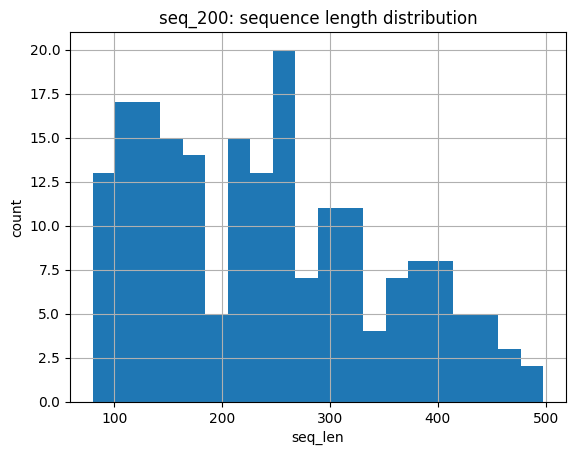

In [10]:
import matplotlib.pyplot as plt

# Summary table
summary = pd.DataFrame({
    "dataset": ["full_1200", "subset_200"],
    "n_rows": [len(df), len(subset_df)],
    "n_unique_pdb": [df["pdb_id"].nunique(), subset_df["pdb_id"].nunique()],
    "n_seq_len_min": [df["seq_len"].min(), subset_df["seq_len"].min()],
    "n_seq_len_max": [df["seq_len"].max(), subset_df["seq_len"].max()],
    "n_seq_len_mean": [df["seq_len"].mean(), subset_df["seq_len"].mean()],
    "resolution_mean": [df["resolution"].mean(), subset_df["resolution"].mean()]
})

print(summary)

# histogram

plt.figure()
subset_df["seq_len"].hist(bins=20)
plt.title("seq_200: sequence length distribution")
plt.xlabel("seq_len")
plt.ylabel("count")
plt.savefig("/content/drive/MyDrive/biolip_gnn/out/seq_len_distribution_day1.png", dpi=300)
plt.show()

In [9]:
SUMMARY_PATH = "/content/drive/MyDrive/biolip_gnn/out/day1_summary.csv"
summary.to_csv(SUMMARY_PATH, index=False)
print("Saved:", SUMMARY_PATH)

Saved: /content/drive/MyDrive/biolip_gnn/out/day1_summary.csv
